In [1]:
%%capture
%run 6.1_Coding_The_GPT_Model.ipynb

In [2]:
def generate_text_simple(model, token_ids, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):
        # Use only last contexts if it exceeds the supported context size
        # Get the predictions
        with torch.no_grad():
            logits = model(token_ids[:, -context_size:])
        
        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]
        
        # Apply softmax to get probabilities
        prob = torch.softmax(logits, dim=-1) # (batch, vocab_size)
        
        # Get the idx of the vocab entry with the highest probability value
        new_token = torch.argmax(prob, dim=-1, keepdim=True)

        # Append new token to the running sequence
        token_ids = torch.cat((token_ids, new_token), dim=1) # (batch, n_tokens+1)
    
    return token_ids

In [18]:
text = "Hello, I am"
input_tokens = torch.tensor(tokenizer.encode(text)).unsqueeze(0)

In [19]:
print("Input Tokens:\n", input_tokens)
print("\nInput Tokens Shape =>", input_tokens.shape)

Input Tokens:
 tensor([[15496,    11,   314,   716]])

Input Tokens Shape => torch.Size([1, 4])


In [20]:
model.eval() # disables dropout since we are not training the model

out = generate_text_simple(
    model=model,
    token_ids=input_tokens,
    max_new_tokens=6,
    context_size=GPT_CONFIG_124M["context_length"]
)

output_text = tokenizer.decode(out.squeeze().tolist())

In [21]:
print("Output:\n", out)
print("\nOutput Length =>", len(out[0]))

Output:
 tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])

Output Length => 10


In [22]:
print("Input Text => ", text)
print("Output Text => ", output_text)

Input Text =>  Hello, I am
Output Text =>  Hello, I am Featureiman Byeswickattribute argue


<div align="center">
  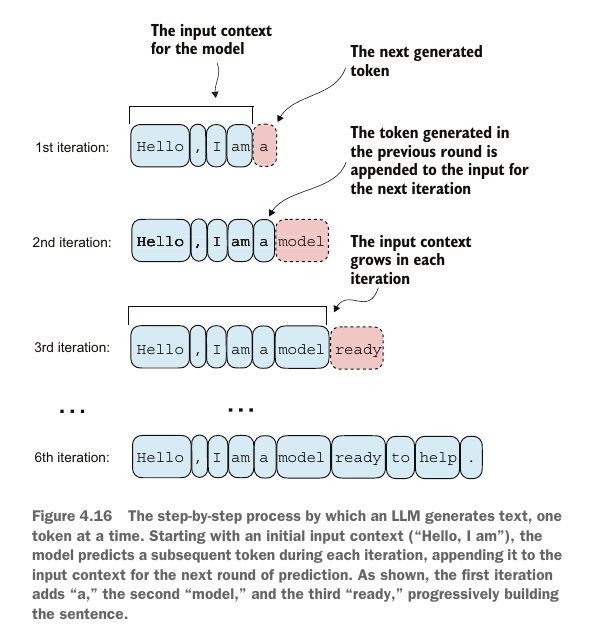
</div>

<div align="center">
  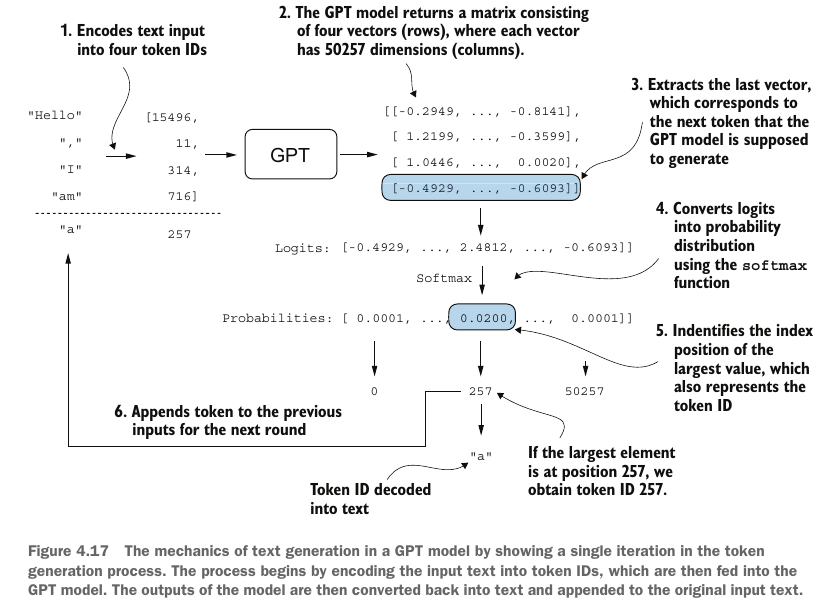
</div>